## Librerias

In [1]:
import pandas as pd
import urllib.request
from PIL import Image

## Data

In [2]:
# Cargar el conjunto de datos de entrenamiento
train_df = pd.read_csv('./data/train.csv', index_col=0)


## Data exploration

In [36]:
train_df.describe()


,Inches,Ram,Weight,Price_in_euros
count,912.000000,912.000000,912.000000,912.000000
mean,14.981579,8.263158,2.026937,1111.724090
std,1.436719,5.044788,0.665466,687.959172
min,10.100000,2.000000,0.690000,174.000000
25%,14.000000,4.000000,1.490000,589.000000
50%,15.600000,8.000000,2.040000,978.000000
75%,15.600000,8.000000,2.300000,1483.942500
max,18.400000,64.000000,4.700000,6099.000000


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
# Mostrar las primeras filas para entender la estructura de los datos
train_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


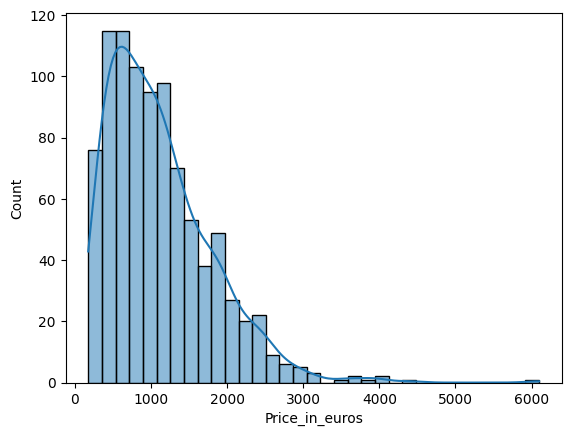

ValueError: could not convert string to float: 'HP'

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo
sns.histplot(train_df['Price_in_euros'], kde=True)
plt.show()

# Correlaciones
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


## Data processing

El target es la columna `Price_in_euros`

In [4]:
# Limpiar y convertir las columnas "Ram" y "Weight" a formato numérico
# Remover 'GB' de Ram y convertir a entero
train_df['Ram'] = train_df['Ram'].str.replace('GB', '').astype(int)

# Remover 'kg' de Weight y convertir a flotante
train_df['Weight'] = train_df['Weight'].str.replace('kg', '').astype(float)

# Revisar los cambios realizados
train_df[['Ram', 'Weight']].head()


,Ram,Weight
laptop_ID,,
755,8,1.86
618,16,2.59
909,8,2.04
2,8,1.34
286,4,2.25


-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [5]:
# Excluir 'Price_in_euros' para formar X, manteniendo las demás columnas
X= train_df.drop('Price_in_euros', axis=1)

# Convertir columnas categóricas a numéricas mediante get_dummies, manteniendo el índice
X= pd.get_dummies(X, drop_first=True)

# La variable objetivo (y), que es 'Price_in_euros'
y = train_df['Price_in_euros']

# Mostrar el resultado de las dimensiones de X y y para confirmar
X.shape, y.shape


((912, 782), (912,))

In [10]:
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [6]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba con la configuración predeterminada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba para confirmar
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((729, 782), (183, 782), (729,), (183,))

In [9]:
X_train

,Inches,Ram,Weight,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1118,17.3,8,3.00,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
153,15.6,16,2.56,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
275,13.3,8,1.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1100,14.0,4,1.54,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
131,17.3,16,2.80,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,14.0,8,1.94,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
996,15.6,6,2.20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
770,12.5,16,1.18,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### 3. Baseline de modelos


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# PRIMER MODELO A PROBAR --> Random Forest

# Inicializar y entrenar un modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular el RMSE para el modelo de Random Forest
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

# SEGUNDO MODELO A PROBAR --> Linear Regression

# Inicializar y entrenar un modelo de Regresión Lineal para comparación
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)

# Calcular el RMSE para el modelo de Regresión Lineal
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

rmse_rf, rmse_lr


(348.0980439972959, 2520737643373.2363)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Configurar los hiperparámetros para probar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, None],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras requeridas en una hoja
}

# Crear el modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring=make_scorer(mean_squared_error, greater_is_better=False), n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Mejor modelo encontrado por GridSearchCV
best_rf_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
y_pred_best_rf = best_rf_model.predict(X_test)

# Calcular el RMSE para el mejor modelo de Random Forest
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

print(f"RMSE con el mejor modelo de Random Forest: {rmse_best_rf}")


Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE con el mejor modelo de Random Forest: 345.9716872422969


In [17]:
# guardo una copia del DF procesado 
X_train.to_csv('X_train_processed.csv', index=True)

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de RMSE.

Random Forest - Buena Opción

- Manejo de la complejidad: Capaz de capturar relaciones no lineales y complejas entre las características y la variable objetivo.
- Robustez frente a overfitting: Con un número adecuado de árboles y técnicas de poda, maneja bien el riesgo de sobreajuste.
- Versatilidad: Funciona bien con una amplia gama de tipos de datos y estructuras, incluyendo características categóricas sin necesidad de transformación previa.
- Buen rendimiento: Un RMSE de 348.10 indica que las predicciones están razonablemente cerca de los valores reales, lo que sugiere un modelo efectivo para este conjunto de datos.
- Mejora continua: Ofrece oportunidades de ajuste fino mediante la optimización de hiperparámetros para mejorar aún más el rendimiento.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [9]:
# Cargar el conjunto de datos de prueba
test_df = pd.read_csv('./data/test.csv', index_col=0)


In [19]:
test_df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.400
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.400
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.900
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.191
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.950


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    int64  
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 36.7+ KB


In [10]:
# Aplicar get_dummies para manejar variables categóricas en el conjunto de prueba
test_df = pd.get_dummies(test_df, drop_first=True)

In [27]:

# Asegurar que el conjunto de prueba tenga las mismas columnas que X_train
# Encuentra las columnas faltantes en el conjunto de prueba y añádelas con valor 0
missing_cols = set(X_train.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0



In [12]:
#  me aseguraro que tienen el mismo orden de columnas que X_train
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)

In [13]:
X_train.head()

,Inches,Ram,Weight,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1118,17.3,8,3.00,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
153,15.6,16,2.56,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
275,13.3,8,1.37,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1100,14.0,4,1.54,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
131,17.3,16,2.80,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [21]:
X_train.columns.value_counts()

Inches                                                            1
ScreenResolution_Touchscreen 2256x1504                            1
ScreenResolution_IPS Panel 4K Ultra HD / Touchscreen 3840x2160    1
ScreenResolution_IPS Panel 4K Ultra HD 3840x2160                  1
ScreenResolution_IPS Panel Full HD / Touchscreen 1920x1080        1
                                                                 ..
Product_Omen 15-ce006nv                                           1
Product_Omen 15-ce007nv                                           1
Product_Omen 17-AN010nv                                           1
Product_Omen 17-W006na                                            1
OpSys_macOS                                                       1
Name: count, Length: 782, dtype: int64

In [14]:
test_df.head()

,Inches,Ram,Weight,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
laptop_ID,,,,,,,,,,,,,,,,,,,,,
209,15.6,0,0,False,False,False,False,False,False,False,...,False,0,0,False,False,True,False,False,False,False
1281,15.6,0,0,False,False,False,False,False,False,False,...,False,0,0,True,False,False,False,False,False,False
1168,15.6,0,0,False,False,False,False,False,False,False,...,False,0,0,False,False,True,False,False,False,False
1231,15.6,0,0,False,False,False,True,False,False,False,...,False,0,0,False,False,False,True,False,False,False
1020,14.0,0,0,False,False,False,False,False,False,True,...,False,0,0,False,False,False,True,False,False,False


In [15]:
# Realizar predicciones con el modelo de Random Forest en el conjunto de prueba
y_pred_test_rf = rf_model.predict(test_df)

# Realizar predicciones con el modelo de Regresión Lineal en el conjunto de prueba
y_pred_test_lr = lr_model.predict(test_df)


**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

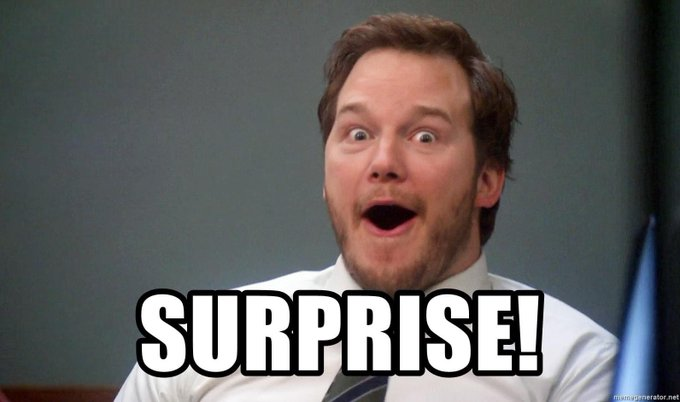

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [25]:
sample = pd.read_csv("data/sample_submission.csv")

In [30]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [26]:
sample.shape

(391, 2)

In [29]:
sample.columns

Index(['laptop_ID', 'Price_in_euros'], dtype='object')

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [31]:
submission = pd.DataFrame({
    "laptop_ID": test_df.index,  # Asegúrate de que esto refleje los IDs correctos de tus laptops
    "Price_in_euros": y_pred_test_rf  # Usa las predicciones de tu modelo preferido aquí
})

In [32]:
submission.head()

,laptop_ID,Price_in_euros
0,209,705.7923
1,1281,313.6240
2,1168,361.6167
3,1231,985.2117
4,1020,1018.5999


In [20]:
submission.shape

(391, 2)

In [27]:
submission.head()

,id,Price_euros
0,1184,2158
1,815,511
2,1244,5290
3,1121,622
4,443,1140


In [19]:
submission.shape

(391, 2)

In [28]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [33]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Iván y Manuel: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `laptops_test.csv`. Lloramos.")

In [34]:
chequeador(submission)

You're ready to submit!
